In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = '/content/drive/MyDrive/FD003/'
train_file = 'train_FD003.txt'
test_file = 'test_FD003.txt'

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv((dir_path+train_file), sep='\s+', header=None,
                 names=col_names)
test = pd.read_csv((dir_path+test_file), sep='\s+', header=None,
                 names=col_names)
y_test = pd.read_csv((dir_path+'RUL_FD003.txt'), sep='\s+', header=None,
                 names=['RemainingUsefulLife'])

# check shape and inspect first few rows
print(train.shape)
train.head()

(24720, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [4]:
train[index_names].groupby('unit_nr').max().describe()

,time_cycles
count,100.00000
mean,247.20000
std,86.48384
min,145.00000
25%,189.75000
50%,220.50000
75%,279.75000
max,525.00000


In [5]:
train[sensor_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


In [6]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[index_names+['RUL']].head()

,unit_nr,time_cycles,RUL
0,1,1,258
1,1,2,257
2,1,3,256
3,1,4,255
4,1,5,254


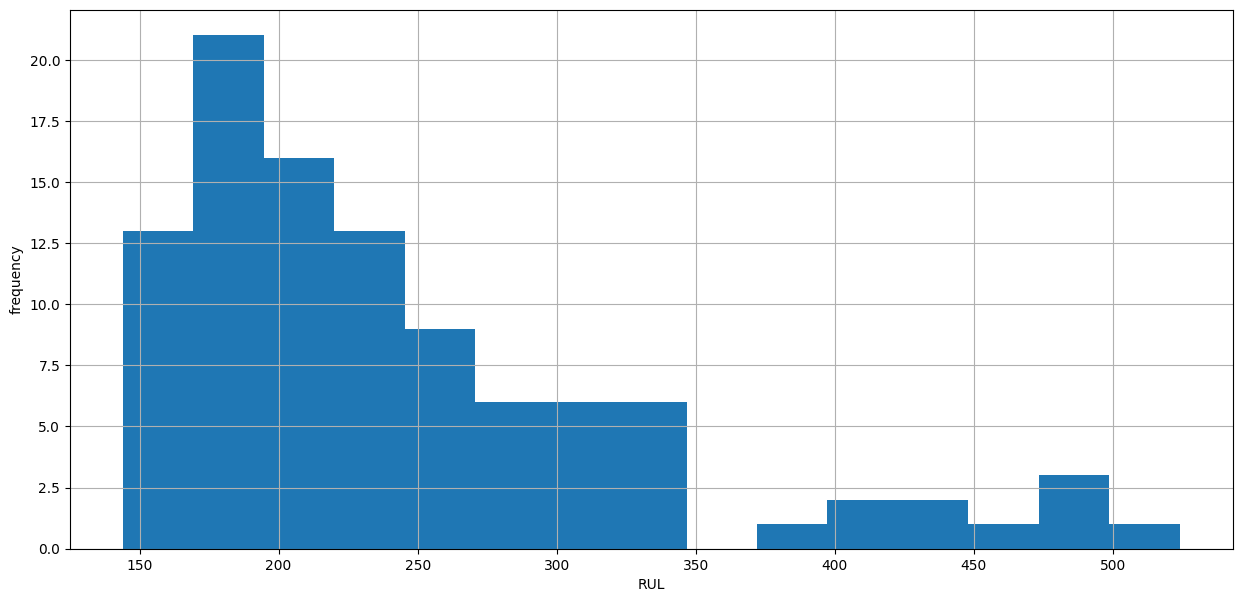

In [7]:
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [8]:
import os
import matplotlib.pyplot as plt
from google.colab import files

# Create a directory for saving plots
output_dir = "sensor_plots_for_Part_4_FD003"
os.makedirs(output_dir, exist_ok=True)

def plot_sensor(sensor_name):
  plt.figure(figsize=(10, 6))
  for i in train['unit_nr'].unique():
    if (i % 10 == 0):
      plt.plot('RUL', sensor_name, data=train[train['unit_nr'] == i])

  plt.xlim(250, 0)
  plt.xticks(np.arange(0, 300, 25))
  plt.ylabel(sensor_name)
  plt.xlabel('Remaning Useful Life')
  # plt.show()

  save_path = os.path.join(output_dir, f"{sensor_name}.png")
  plt.savefig(save_path, dpi=300)
  plt.close()

# Plot and save images for all sensors
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

!zip -r sensor_plots_for_Part_4_FD003.zip sensor_plots_for_Part_4_FD003
files.download("sensor_plots_for_Part_4_FD003.zip")

  adding: sensor_plots_for_Part_4_FD003/ (stored 0%)
  adding: sensor_plots_for_Part_4_FD003/s_13.png (deflated 7%)
  adding: sensor_plots_for_Part_4_FD003/s_16.png (deflated 39%)
  adding: sensor_plots_for_Part_4_FD003/s_21.png (deflated 4%)
  adding: sensor_plots_for_Part_4_FD003/s_17.png (deflated 5%)
  adding: sensor_plots_for_Part_4_FD003/s_11.png (deflated 5%)
  adding: sensor_plots_for_Part_4_FD003/s_10.png (deflated 18%)
  adding: sensor_plots_for_Part_4_FD003/s_1.png (deflated 45%)
  adding: sensor_plots_for_Part_4_FD003/s_5.png (deflated 43%)
  adding: sensor_plots_for_Part_4_FD003/s_7.png (deflated 5%)
  adding: sensor_plots_for_Part_4_FD003/s_15.png (deflated 4%)
  adding: sensor_plots_for_Part_4_FD003/s_12.png (deflated 6%)
  adding: sensor_plots_for_Part_4_FD003/s_18.png (deflated 41%)
  adding: sensor_plots_for_Part_4_FD003/s_4.png (deflated 4%)
  adding: sensor_plots_for_Part_4_FD003/s_19.png (deflated 45%)
  adding: sensor_plots_for_Part_4_FD003/s_8.png (deflated 7%)
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_nr'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name,
                     data=df[df['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor in sensor_names:
    plot_signal(train, sensor)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
drop_sensors = ['s_1','s_5','s_16','s_18','s_19']  # s_6 and s_10 get the benefit of the doubt
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']


X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
y_train_clipped = y_train.clip(upper=125)  # apply RUL clipping from earlier posts

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge,
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:63.494471921833316, R2:0.5873657567234015
test set RMSE:57.05730530060164, R2:-0.8998253079754919


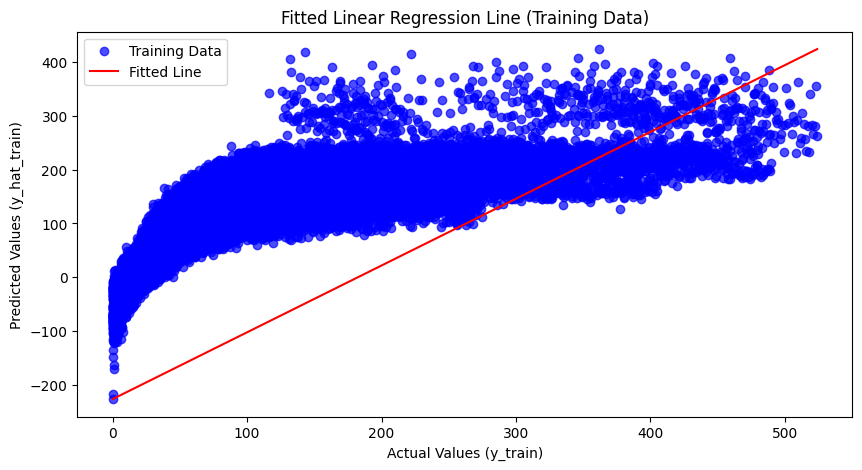

In [13]:
import matplotlib.pyplot as plt

# Plot for Training Data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_hat_train, alpha=0.7, label="Training Data", color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_hat_train), max(y_hat_train)], color='red', label="Fitted Line")
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_hat_train)")
plt.title("Fitted Linear Regression Line (Training Data)")
plt.legend()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [15]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42)
rf.fit(X_train, y_train_clipped)
y_hat_train = rf.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:5.9199939580022525, R2:0.9787661901585051
test set RMSE:21.05308450085165, R2:0.7413439613827657


In [16]:
print(rf.estimators_[5].tree_.max_depth)
rf.estimators_[5].tree_.n_node_samples

33


array([15616, 11694,  7793, ...,     1,     1,     4], dtype=int64)

In [17]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           max_depth=8, min_samples_leaf=50)

rf.fit(X_train, y_train_clipped)

y_hat_train = rf.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:15.706704198492831, R2:0.8505294865338602
test set RMSE:20.994958823842456, R2:0.7427702419664686


In [18]:
# !apt-get install graphviz

In [19]:
# # Install Graphviz in Colab
# !apt-get install graphviz

# from sklearn.tree import export_graphviz
# from subprocess import call
# from IPython.display import Image, display

# def export_rf_visual(estimator, file_name, dpi):
#     # Create visualization of decision tree
#     tree = export_graphviz(estimator,
#                            out_file=f'{file_name}.dot',
#                            feature_names=X_train.columns,  # column names
#                            filled=True,
#                            special_characters=True,
#                            rotate=True)

#     # Convert to PNG using system command (requires Graphviz)
#     call(['dot', '-Tpng', f'{file_name}.dot', '-o', f'{file_name}.png', f'-Gdpi={dpi}'])
#     print(f'Estimator successfully exported to: {file_name}.png')

# # Export and display in Colab
# file_name = 'tree_FD003'
# export_rf_visual(rf.estimators_[5], file_name, dpi=200)

# # Display the image in the notebook
# display(Image(filename=f'{file_name}.png'))

# print("Please Note this is just Part of the decision tree, note this visualization only represents a single tree of the RF")

In [20]:
drop_sensors = ['s_1','s_5', 's_9', 's_14', 's_16','s_18','s_19']
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_10',
       's_11', 's_12', 's_13', 's_15', 's_17', 's_20', 's_21']

X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
y_train_clipped = y_train.clip(upper=125)

X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [21]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           max_depth=8, min_samples_leaf=50)

rf.fit(X_train, y_train_clipped)

y_hat_train = rf.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:17.598192835079978, R2:0.8123616776758054
test set RMSE:22.186214762363356, R2:0.7127516253047333


In [22]:
drop_sensors = ['s_1','s_5','s_16','s_18','s_19']  # s_6 and s_10 get the benefit of the doubt
drop_labels = index_names+setting_names+drop_sensors
remaining_sensors = ['s_2', 's_3', 's_4', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']


X_train = train.drop(drop_labels, axis=1)
y_train = X_train.pop('RUL')
y_train_clipped = y_train.clip(upper=125)  # apply RUL clipping from earlier posts

# Since the true RUL values for the test set are only provided for the last time cycle of each enginge,
# the test set is subsetted to represent the same
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_labels, axis=1)

In [23]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           max_depth=8, min_samples_leaf=50)

rf.fit(X_train, y_train_clipped)

y_hat_train = rf.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:15.706704198492831, R2:0.8505294865338602
test set RMSE:20.994958823842456, R2:0.7427702419664686


In [24]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

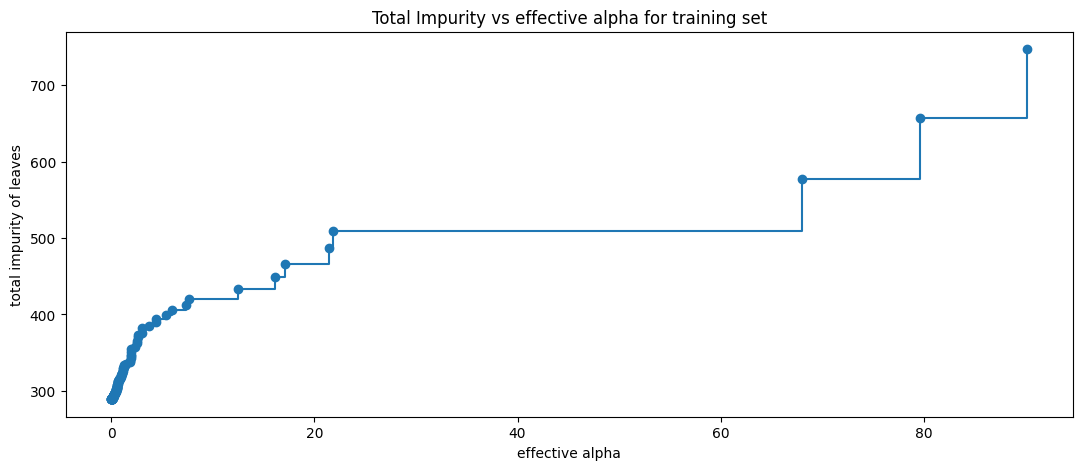

In [25]:
path = rf.estimators_[5].cost_complexity_pruning_path(X_train, y_train_clipped)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(13,5))
# the root node of the tree (indexed with [:-1]) is left out of the analysis, as without it there wouldn't be a tree
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [26]:
max_depth = [None] + list(range(3, 34, 3))
min_samples_leaf = list(range(1, 102, 10))
min_impurity_decrease = list(np.arange(0,147)/10)
ccp_alpha = list(np.round(np.linspace(0, 2, 81), decimals=3))

parameters = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,
    'ccp_alpha': ccp_alpha
}

tuning_options = len(max_depth) * len(min_samples_leaf) * len(min_impurity_decrease) * len(ccp_alpha)
print(tuning_options)

1571724


In [27]:
rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42,
                           min_samples_leaf=11, min_impurity_decrease=0.0,
                           max_depth=15, ccp_alpha=0.125)
rf.fit(X_train, y_train_clipped)

# predict and evaluate
y_hat_train = rf.predict(X_train)
evaluate(y_train_clipped, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:13.95446880579081, R2:0.8820190156933622
test set RMSE:20.61288923394374, R2:0.7520472702746352


In [30]:
print("y_test type:", type(y_test))
print("y_test shape:", y_test.shape)
print("y_test columns:", y_test.columns if isinstance(y_test, pd.DataFrame) else "No columns (Series)")
print("y_test head:\n", y_test.head())

y_test type: <class 'pandas.core.frame.DataFrame'>
y_test shape: (100, 1)
y_test columns: Index(['RemainingUsefulLife'], dtype='object')
y_test head:
    RemainingUsefulLife
0                   44
1                   51
2                   27
3                  120
4                  101


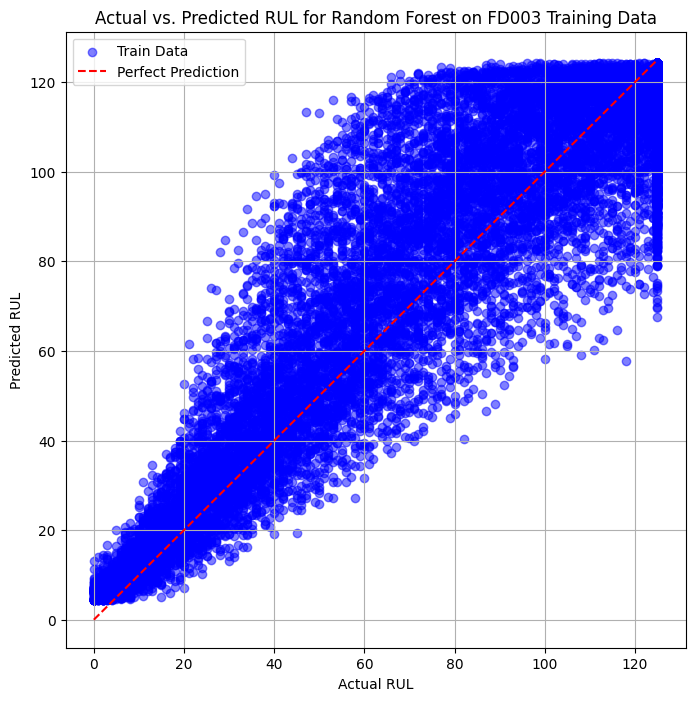

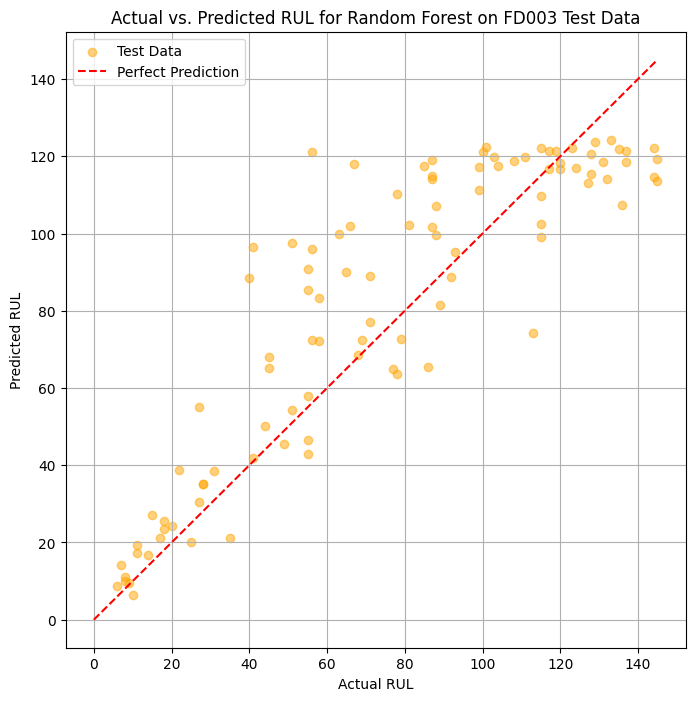

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_test is a 1D array for plotting
if isinstance(y_test, pd.DataFrame):
    # Try to access 'RUL' column; if not found, use the first column
    try:
        y_test_values = y_test['RUL'].values
    except KeyError:
        y_test_values = y_test.iloc[:, 0].values  # Use first column if 'RUL' is missing
elif isinstance(y_test, pd.Series):
    y_test_values = y_test.values  # Direct values for Series
else:
    raise ValueError("y_test must be a pandas DataFrame or Series")

# Figure G.15: Actual vs. Predicted RUL for Random Forest on FD003 Training Data
plt.figure(figsize=(8,8))
plt.scatter(y_train_clipped, y_hat_train, label="Train Data", alpha=0.5, color="blue")
plt.plot([0, 125], [0, 125], 'r--', label="Perfect Prediction")
plt.grid(True)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL for Random Forest on FD003 Training Data")
plt.legend()
plt.show()

# Figure G.16: Actual vs. Predicted RUL for Random Forest on FD003 Test Data
plt.figure(figsize=(8,8))
plt.scatter(y_test_values, y_hat_test, label="Test Data", alpha=0.5, color="orange")
# Use scalar values for the perfect prediction line
max_rul = max(y_test_values.max(), y_hat_test.max())
plt.plot([0, max_rul], [0, max_rul], 'r--', label="Perfect Prediction")
plt.grid(True)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs. Predicted RUL for Random Forest on FD003 Test Data")
plt.legend()
plt.show()